# TP1 - Exercise 2

## Name: Mateus Ribeiro da Silva

In [9]:
#Importing some libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.utils import shuffle

In [173]:
#Merging the datasets

def dataset_fusion(A, B):

    """
    This function merge two datasets and sort them based on the value column
    """

    dataset = pd.merge(A, B, how='outer')
    dataset = shuffle(dataset).sort_values('Value').reset_index(drop=True)

    return dataset 

def draw_ROC(dataset):

    x, y = 0,0
    A, B = [0], [0]   

    #Count in reverse order, i.e, down to up
    for category in dataset['Dataset'].iloc[::-1]:
    
        if category=='A':
            x += 1
        if category=='B':
            y += 1

        A.append(x/50)
        B.append(y/50)

    fig, ax = plt.subplots(1,1,figsize=(12,12))
    ax.plot(A, B, label='ROC Curve')
    ax.plot([0, 0.5, 1], [0, 0.5, 1], label='Identity Curve')
    ax.grid()
    ax.legend()


def performance_parameters(dataset, threshold):

    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for value, category in dataset.itertuples(index=False):

        if value > threshold:
            if category == 'B':
                TP += 1
            else:
                FP += 1

        if value < threshold:
            if category == 'A':
                TN += 1
            else:
                FN += 1
    
    accuracy = (TP + TN)/(TP+FP+FN+TN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    fallout = FP/(FP+TN)
    f_measure = (2*precision*recall)/(precision+recall)
    jaccard_index = TP/(TP+FP+FN)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('Fall out:', fallout)
    print('f-measure:', f_measure)
    print('Jaccard Index:', jaccard_index)

In [140]:
#Creating datasets
np.random.seed(23)

dataset_A = pd.DataFrame({'Value': np.random.normal(loc=0, scale=1, size=(50,1)).flatten().tolist(), 
                          'Dataset': ['A' for i in range(50)]})
dataset_B = pd.DataFrame({'Value': np.random.normal(loc=2, scale=1.5, size=(50,1)).flatten().tolist(), 
                          'Dataset': ['B' for i in range(50)]})

In [141]:
#Some informations about dataset A
dataset_A.describe()

,Value
count,50.000000
mean,0.033507
std,0.918942
min,-2.506230
25%,-0.550938
50%,0.043078
75%,0.669352
max,1.968435


In [142]:
#Some information abou dataset B
dataset_B.describe()

,Value
count,50.000000
mean,2.281804
std,1.475850
min,-0.584880
25%,1.332764
50%,2.173446
75%,2.993635
max,6.781254


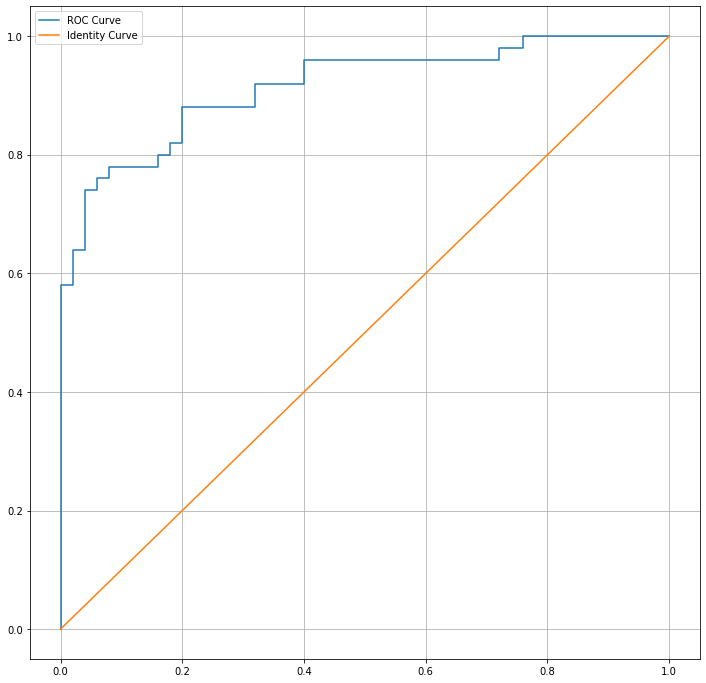

In [143]:
dataset_1 = dataset_fusion(dataset_A, dataset_B)
draw_ROC(dataset_1)

In [144]:
pd.set_option('display.max_rows', None)
dataset_1

,Value,Dataset
0,-2.506230,A
1,-1.838068,A
2,-1.322148,A
3,-1.223255,A
4,-1.137460,A
5,-1.051082,A
6,-1.043450,A
7,-1.009942,A
8,-0.952510,A
9,-0.938769,A


## Analyzing the Dataset 1 we can choose a threshold close to the 'Value' column median. Thus, the threshold firstly chosen was 0.8

In [175]:
performance_parameters(dataset_1, 0.8)

Accuracy: 0.82
Precision: 0.8076923076923077
Recall: 0.84
Fall out: 0.2
f-measure: 0.8235294117647058
Jaccard Index: 0.7


## The threshold chosen give us a nice result. The accuracy is satisfatory, as well as the precision. Through ROC curve we got 0.84 recall, which is a reasonable result, and the Fall out obtained was 0.2 which can be not so good in some cases, so we can purpose another threshold. Choosing a threshold value of 1.3

In [176]:
performance_parameters(dataset_1, 1.3)

Accuracy: 0.84
Precision: 0.925
Recall: 0.74
Fall out: 0.06
f-measure: 0.8222222222222222
Jaccard Index: 0.6981132075471698


## As we can see, the new threshold give us better accuracy and precision. Although the recall has decreased the fallout is way smaller too, so this threshold is preferred until now. Proposing a threshold with value 1.5 we got the following results....

In [177]:
performance_parameters(dataset_1, 1.5)

Accuracy: 0.85
Precision: 0.9487179487179487
Recall: 0.74
Fall out: 0.04
f-measure: 0.8314606741573033
Jaccard Index: 0.7115384615384616


## The results obtained were pretty close to the last threshold proposed, however, the value 1.5 evaluate better results in accuracy and precision. The recall remains the same, but the fall out decreased, which is a excelent result. Choosing a last one threshold.

In [186]:
performance_parameters(dataset_1, 1.8)

Accuracy: 0.81
Precision: 0.9696969696969697
Recall: 0.64
Fall out: 0.02
f-measure: 0.7710843373493975
Jaccard Index: 0.6274509803921569


## As we can see the f-measure decreased considerably due to the fact that recall is 0.1 smaller than the last result obtained. Even the recall is worse than the last result, the fall out has decreased too, so in cases where we would focus in eliminate False Positive results this could be a nice threshold.

# Compute a dataset with means and standard deviations closer.

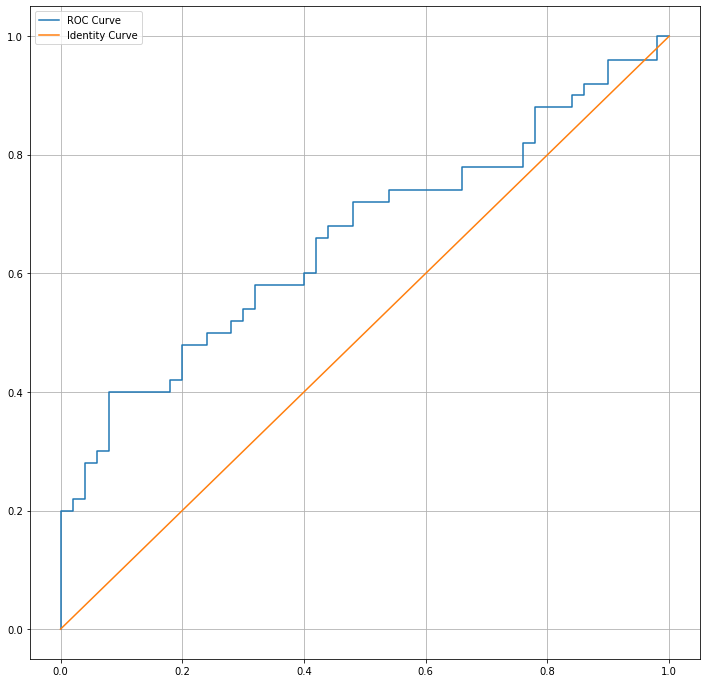

In [188]:
np.random.seed(23)

dataset_A = pd.DataFrame({'Value': np.random.normal(loc = 0, scale=1, size=(50,1)).flatten().tolist(), 
                          'Dataset': ['A' for i in range(50)]})
dataset_B = pd.DataFrame({'Value': np.random.normal(loc = 0.5, scale=1.5, size=(50,1)).flatten().tolist(), 
                          'Dataset': ['B' for i in range(50)]})

dataset_2 = dataset_fusion(dataset_A, dataset_B)
draw_ROC(dataset_2)

## We can see in the ROC Curve obtained now that with datasets having close values in mean and standard deviation we got a worst curve in comparison with the last one. This because the values are pretty much harder to separate, since the values are distributed in the 'same' region.

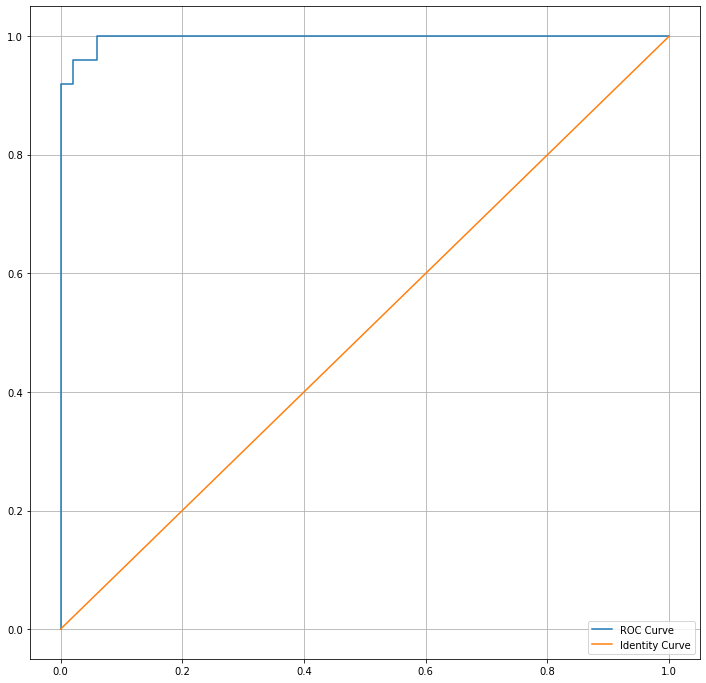

In [189]:
np.random.seed(23)

dataset_A = pd.DataFrame({'Value': np.random.normal(loc = 0, scale=1, size=(50,1)).flatten().tolist(), 
                          'Dataset': ['A' for i in range(50)]})
dataset_B = pd.DataFrame({'Value': np.random.normal(loc = 3, scale=1, size=(50,1)).flatten().tolist(), 
                          'Dataset': ['B' for i in range(50)]})

dataset_2 = dataset_fusion(dataset_A, dataset_B)
draw_ROC(dataset_2)

## However, when the values are distributed in differents 'regions' we got a dataset which is much easier to separate, as we can see in the ROC curve obtained.

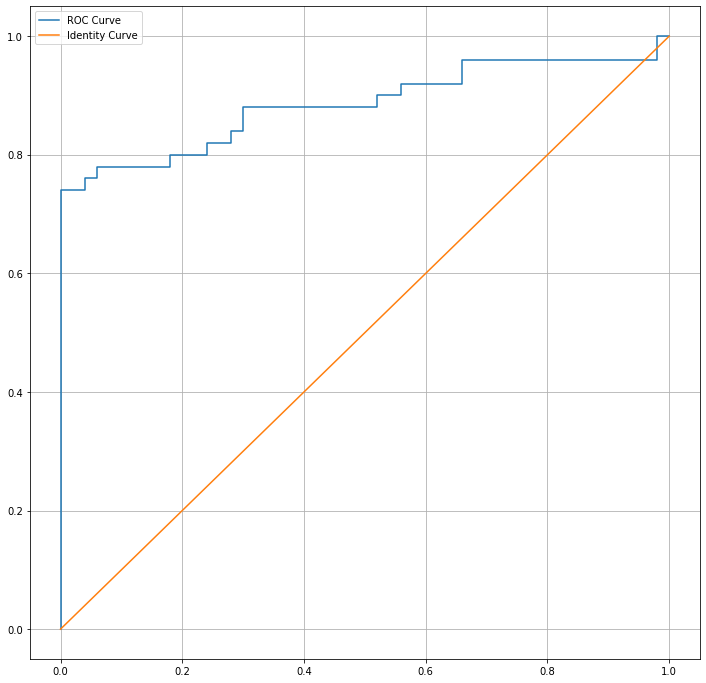

In [193]:
np.random.seed(23)

dataset_A = pd.DataFrame({'Value': np.random.normal(loc = 0, scale=1, size=(50,1)).flatten().tolist(), 
                          'Dataset': ['A' for i in range(50)]})
dataset_B = pd.DataFrame({'Value': np.random.normal(loc = 3, scale=3, size=(50,1)).flatten().tolist(), 
                          'Dataset': ['B' for i in range(50)]})

dataset_2 = dataset_fusion(dataset_A, dataset_B)
draw_ROC(dataset_2)

## Increasing the standard deviation we can see that the value obtained is worse than the last. This was expected due to the fact that when we raise the standard deviation, we create a dataset which is more sparse, and can create a intersection with the other dataset, making the separation harder.